In [1]:
%matplotlib inline

In [2]:
import mcfly
import keras as ks
import numpy as np
np.set_printoptions(linewidth=140, edgeitems=5)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.cm as cm
import matplotlib as mpl

Using TensorFlow backend.


In [3]:
model = ks.models.load_model('./tutorial/model/model.h5')

From tutorial, load data:

In [4]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from utils import tutorial_pamap2

In [5]:
# Specify in which directory you want to store the data:
directory_to_extract_to = '.'

In [6]:
data_path = tutorial_pamap2.download_preprocessed_data(directory_to_extract_to)

Extracting data...
Done


In [7]:
X_train, y_train_binary, X_val, y_val_binary, X_test, y_test_binary, labels = tutorial_pamap2.load_data(data_path)

# Do stuff
Per activity type, make nice picture. E.g.: audio spectrogram.

## Let's first inspect the data

In [8]:
print(X_train.shape, X_train[0].shape)

(11397, 512, 9) (512, 9)


In [9]:
y_train_binary[:8]

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.]])

That's nice, all labels are in the first 8 entries, so a complete set of examples is given by:

In [10]:
all_label_indices = np.array((0, 1, 2, 3, 4, 6, 7))
y_train_binary[all_label_indices]

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.]])

In [11]:
labels

['lying',
 'sitting',
 'standing',
 'walking',
 'cycling',
 'vaccuum_cleaning',
 'ironing']

In [12]:
print(X_train[0])

[[-2.04104   5.78793   7.53352   9.26343  -1.32145  -3.5404   -0.402806  9.87892  -1.46851 ]
 [-2.03623   5.90275   7.64867   9.14345  -1.31849  -3.81178  -0.402061  9.72856  -1.42928 ]
 [-2.04425   5.90074   7.41763   9.15135  -1.28277  -3.54179  -0.365935  9.84089  -1.50644 ]
 [-2.03943   5.8262    7.5719    9.25853  -1.20594  -3.73412  -0.330208  9.80259  -1.58311 ]
 [-1.84995   5.90062   7.57449   9.14836  -1.434    -3.61806  -0.288562  9.84091  -1.46631 ]
 ..., 
 [-2.00057   5.78831   7.6111    9.18638  -1.32034  -3.61838  -0.484109  9.68985  -1.62425 ]
 [-2.07642   5.75095   7.61009   9.18618  -1.3583   -3.61814  -0.289806  9.80299  -1.50493 ]
 [-1.88239   5.90226   7.72795   9.17958  -1.35638  -3.84976  -0.333739  9.76416  -1.69921 ]
 [-2.19086   5.78943   7.56976   9.30086  -1.32169  -3.54002  -0.486596  9.61403  -1.70149 ]
 [-2.07348   5.78956   7.68698   9.14636  -1.39539  -3.6955   -0.217307  9.68902  -1.61941 ]]


The different channels have quite different mean values. Let's renormalize them all so their median values are zero.

In [13]:
data = X_train - np.median(X_train, axis=1)[:,None,:]

In [14]:
N_channels = data.shape[-1]
N_timebins = data.shape[1]
dt = 0.01 # seconds

In [15]:
np.where(y_train_binary[all_label_indices])[1]

array([1, 6, 5, 3, 4, 0, 2])

In [16]:
label_lookup = np.where(y_train_binary[all_label_indices])[1]

## Okay, plotting time

In [39]:
import timeseries_visualization as tsv

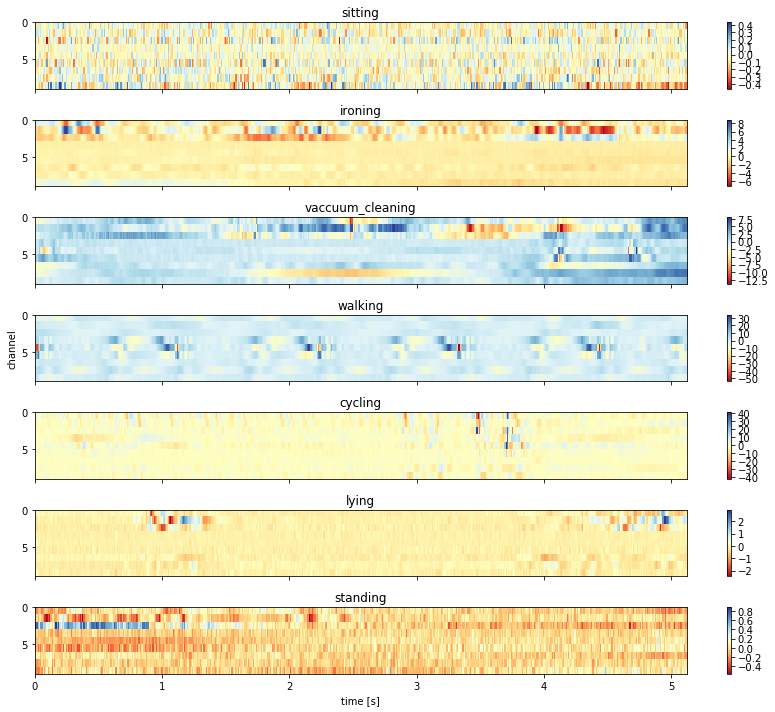

In [45]:
fig, ax = plt.subplots(len(labels), sharex=True, figsize=(12,10))
ax[-1].set_xlabel('time [s]')
ax[len(labels)//2].set_ylabel('channel')

for ix, label_ix in enumerate(all_label_indices):
    tsv.plot_timeseries(data[label_ix], dt, ax=ax[ix], title=labels[label_lookup[ix]],
                        minimal_layout=False, draw_labels=False)

## Fourier

What about Fourier space? Let's look at the absolute value in Fourier space.

N.B.: only need the first half, the second half is a mirror, since the input data is real.

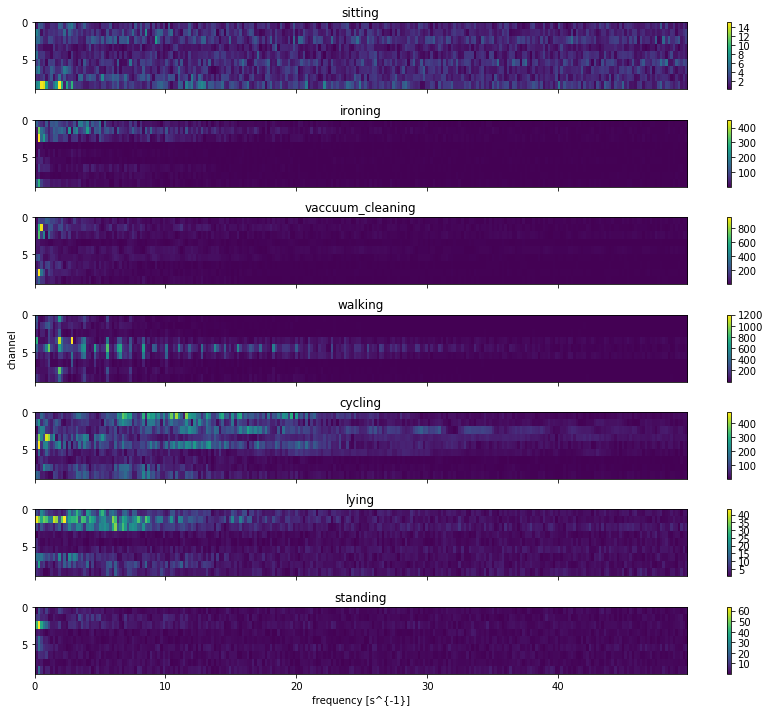

In [42]:
fig, ax = plt.subplots(len(labels), sharex=True, figsize=(12,10))
ax[-1].set_xlabel('frequency [s^{-1}]')
ax[len(labels)//2].set_ylabel('channel')

for ix, label_ix in enumerate(all_label_indices):
    tsv.plot_timeseries_fourier_amplitudes(data[label_ix], dt, ax=ax[ix], title=labels[label_lookup[ix]],
                                           minimal_layout=False, draw_labels=False)

## For use in the Quiver visualization
There we will want minimalistic pics, so call like this:

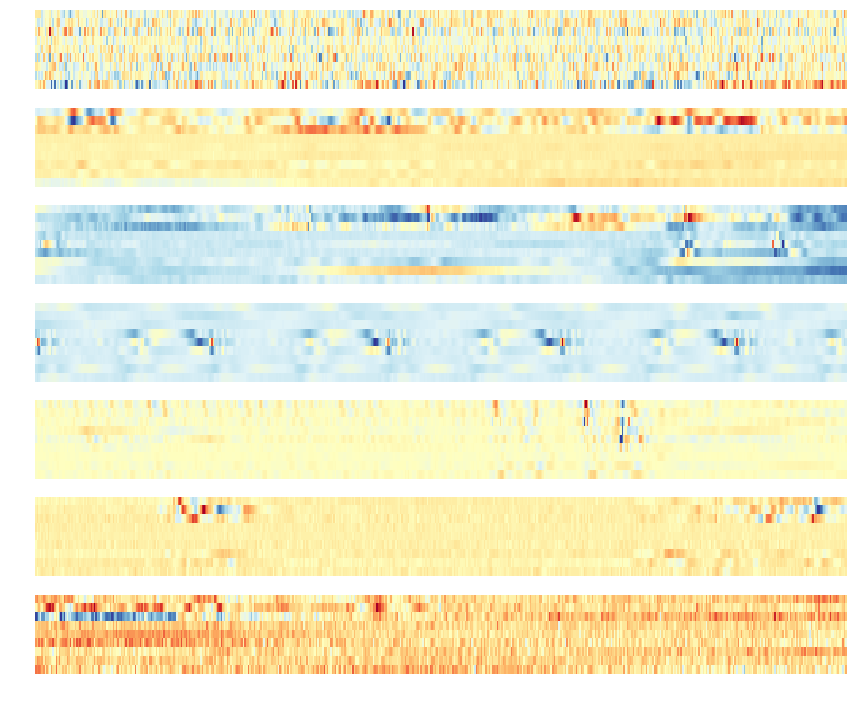

In [47]:
fig, ax = plt.subplots(len(labels), sharex=True, figsize=(12,10), frameon=False)
ax[-1].set_xlabel('time [s]')
ax[len(labels)//2].set_ylabel('channel')

for ix, label_ix in enumerate(all_label_indices):
    tsv.plot_timeseries(data[label_ix], dt, ax=ax[ix], minimal_layout=True, draw_colorbar=False)

fig.savefig('timeseries.png')

# Fourier vs time

Let's try something different: for each channel, per timeseries, do an FFT and plot those vertically next to each other.

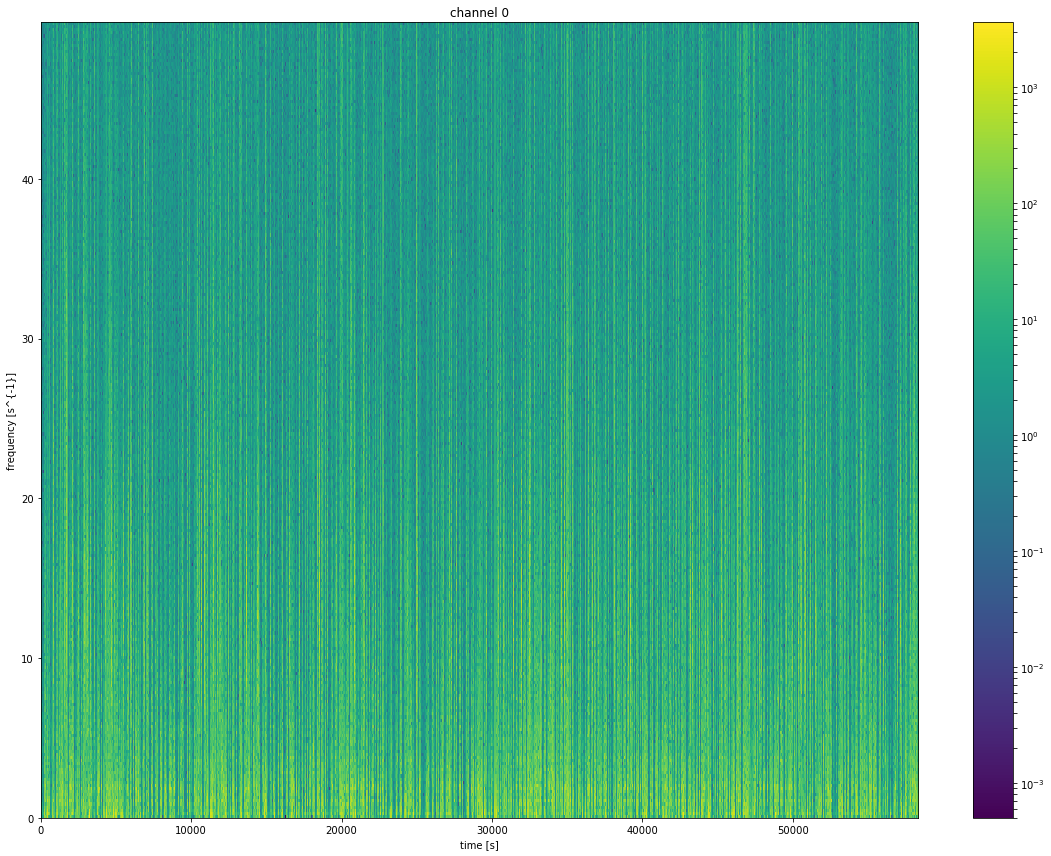

In [19]:
fig, ax = plt.subplots(1, figsize=(16,12))
ax.set_xlabel('time [s]')
ax.set_ylabel('frequency [s^{-1}]')

time = np.fft.fftfreq(N_timebins, d=0.01)  # s^{-1}
central_timebin = N_timebins // 2
if N_timebins % 2 == 0:
    central_timebin -= 1
fmin = frequencies[0]
fmax = frequencies[central_timebin]

ix = 0

fdata = np.fft.fft(data[:,:,ix], axis=1)[:,:central_timebin+1]

im = ax.imshow(np.abs(fdata).T, aspect='auto', interpolation='nearest', origin='bottom',
               extent=(0, 5.12 * len(fdata), fmin, fmax), norm=mpl.colors.LogNorm())

ax.set_title("channel {ix}".format(ix=ix))
fig.colorbar(im, ax=ax)

plt.tight_layout()

This doesn't yield much insight... Let's try the other channels to be sure.

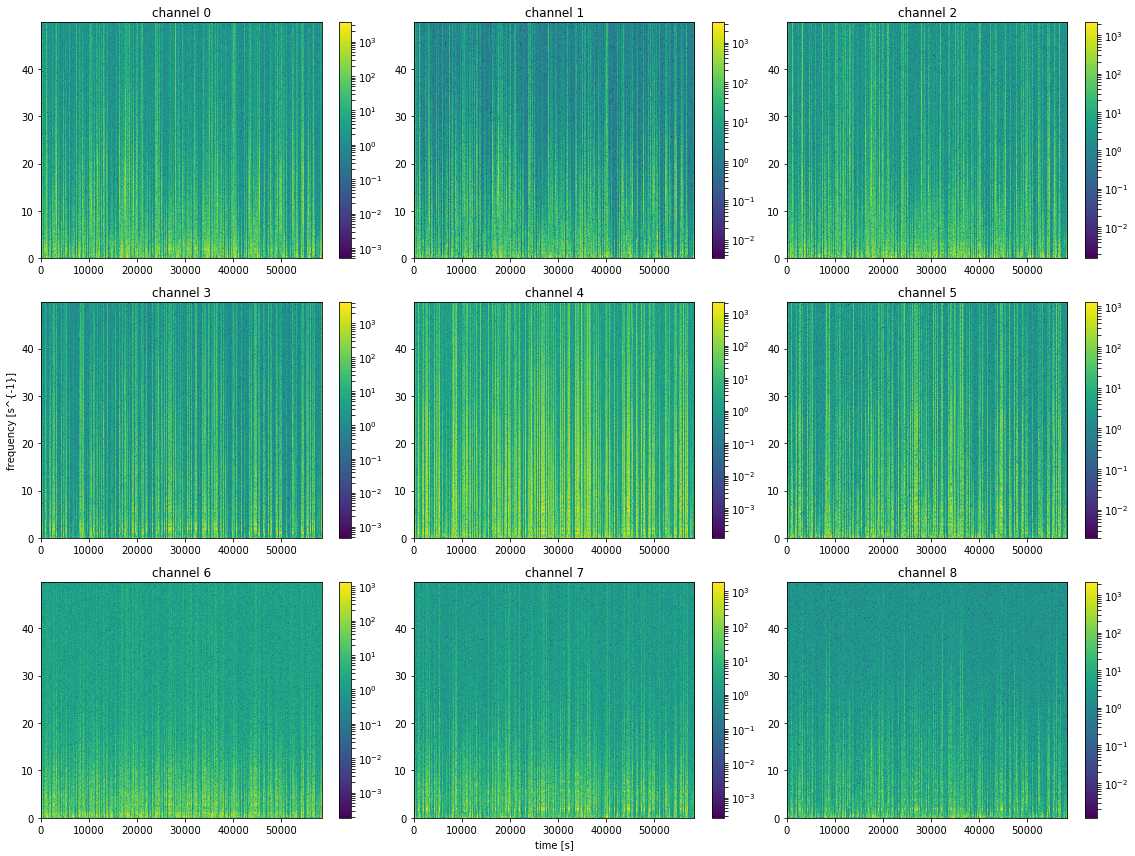

In [20]:
fig, ax = plt.subplots(3, 3, figsize=(16,12))

ax[2,1].set_xlabel('time [s]')
ax[1,0].set_ylabel('frequency [s^{-1}]')

time = np.fft.fftfreq(N_timebins, d=0.01)  # s^{-1}
central_timebin = N_timebins // 2
if N_timebins % 2 == 0:
    central_timebin -= 1
fmin = frequencies[0]
fmax = frequencies[central_timebin]

for channel in range(9):
    axi = ax.flatten()[channel]
    
    fdata = np.fft.fft(data[:,:,channel], axis=1)[:,:central_timebin+1]

    im = axi.imshow(np.abs(fdata).T, aspect='auto', interpolation='nearest', origin='bottom',
                   extent=(0, 5.12 * len(fdata), fmin, fmax), norm=mpl.colors.LogNorm())

    axi.set_title("channel {ix}".format(ix=channel))
    fig.colorbar(im, ax=axi)

    plt.tight_layout()